# Выявление закономерностей, определяющих успешность игр

**Описание проекта**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Доступны данные до 2016 года. Данные за 2016 год могут быть неполными. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 

**Описание данных**

* `Name` — название игры,
* `Platform` — платформа,
* `Year_of_Release` — год выпуска,
* `Genre` — жанр игры,
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий),
* `EU_sales` — продажи в Европе (миллионы проданных копий),
* `JP_sales` — продажи в Японии (миллионы проданных копий),
* `Other_sales` — продажи в других странах (миллионы проданных копий),
* `Critic_Score` — оценка критиков (максимум 100),
* `User_Score` — оценка пользователей (максимум 10),
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

__План работы:__

[1. Откроем файл с данными и изучим общую информацию.](#section1)

[1.1  Изучим общую информацию о полученном датафрейме.](#section2)

[1.2  Проверим сумму дубликатов.](#section3)

[1.3  Проверим количество пропусков.](#section4)

[1.4  Посмотрим описание столбцов датафрейма.](#section5)

[1.5 Сделаем промежуточные выводы.](#section6)

[2. Предобработка данных.](#section7)

[2.1  Приведем названия столбцов к регистру "snake_case".](#section8)

[2.2  Проверим неплные дубликаты.](#section9)

[2.3  Обработаем пропущенные значения в столбцах.](#section10)

[2.4  Заменим типы данных.](#section11)

[2.5  Добавим общее количество продаж.](#section12)

[2.6  Промежуточные выводы.](#section13)

[3  Проведем исследовательский анализ данных.](#section14)

[3.1  Посмотрим, сколько игр выпускалось в разные годы.](#section15)

[3.2  Посмотрим, как менялись продажи по платформам.](#section16)

[3.3  Оценим продолжительность жизни платформ.](#section17)

[3.4  Возьмем данные за соответствующий актуальный период.](#section18)

[3.5  Определим какие платформы лидируют по продажам, растут или падают.](#section19)

[3.6  Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.](#section20)

[3.7  Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.](#section21)

[3.8  Соотнесем выводы с продажами игр на других платформах.](#section22)

[3.9  Посмотрим на общее распределение игр по жанрам.](#section23)

[3.10  Сделаем промежуточные выводы.](#section24)

[4  Составим портрет пользователя каждого региона.](#section25)

[4.1  Самые популярные платформы (топ-5).](#section26)

[4.2  Самые популярные жанры (топ-5).](#section27)

[4.3  Влияние рейтинга ESRB на продажи в отдельном регионе.](#section28)

[4.4  Сделаем промежуточные выводы.](#section29)

[5  Сделаем общий вывод.](#section30)

<a id='section1'></a>
## Откроем файл с данными и изучим общую информацию.

Путь к файлу: `/datasets/games.csv`

In [1]:
# установим пакет missingno

! pip install missingno

In [2]:
# Импортируем нужные библиотеки
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import warnings


from IPython.display import display

# отключим предупреждения для удобства просмотра результатов
warnings.filterwarnings('ignore')

In [3]:
# считаем датасет в переменную data
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

<a id='section2'></a>
### Изучим общую информацию о полученном датафрейме:

Выведем на экран первые 10 строк датафрейма:

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем общую информацию о датафрейме:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a id='section3'></a>
### Проверим сумму дубликатов:

In [6]:
data.duplicated().sum()

0

Неполные дубликаты проверим и устраним на этапе [предобратботки данных](#section9).

<a id='section4'></a>
### Проверим количество пропусков:

<AxesSubplot:>

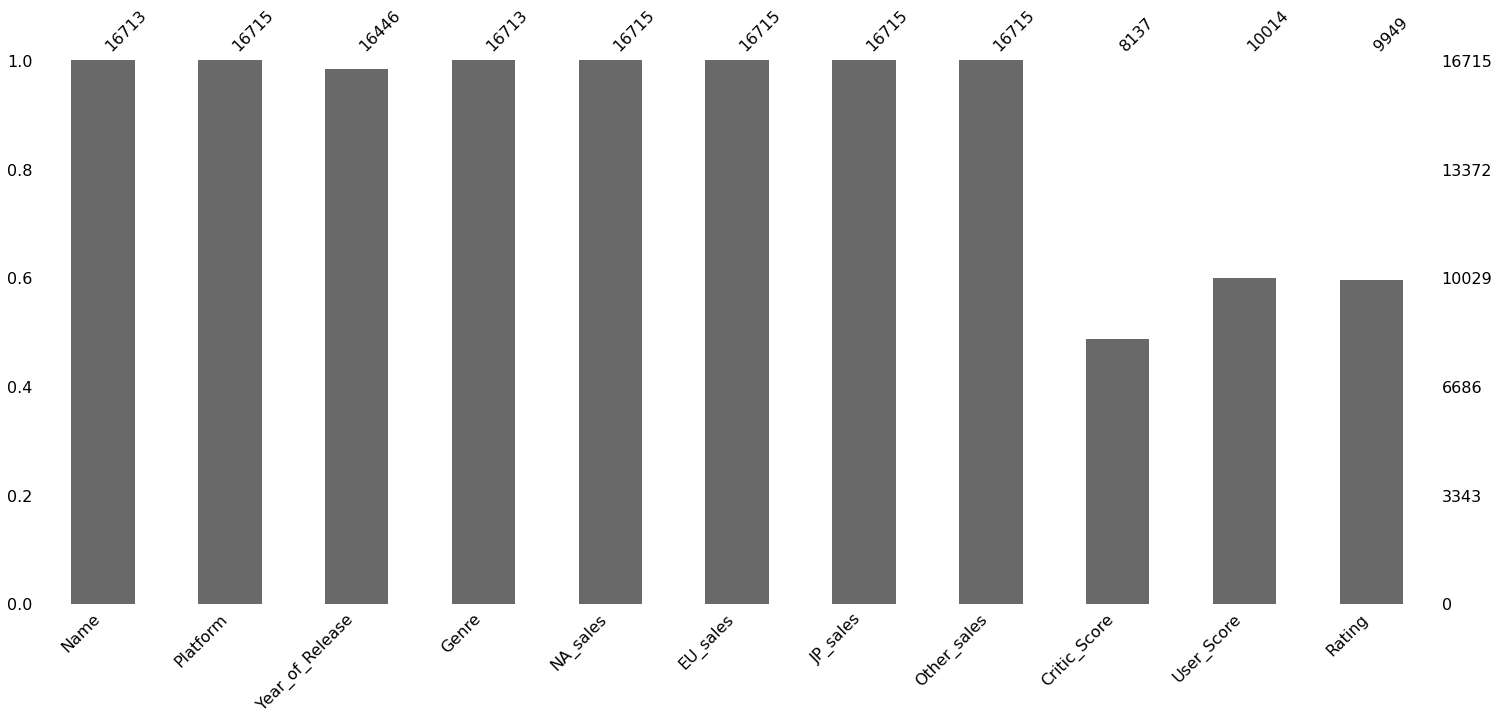

In [7]:
msno.bar(data)

<a id='section5'></a>
### Посмотрим описание столбцов датафрейма:

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


<a id='section6'></a>
###  Промежуточные выводы:

В ходе изученния данных:
* сохранили файл в датафрейм `data`,
* вывели на экран и изучили:
    - первые строки датафрейма, 
    - метод `info()`,
    - метод `describe()`,
    - дубли,
    - пропуски.
* явных дубликатов не выявлено.

По итогам изучения необходимо:
* привести названия всех полей в нижний регистр "snake_case".
* проверить неполные дубликаты в категориальных столбцах.
* изменить тип данных в столбцах:
    - `Year_of_Release` — float64 в int32 - год выпуска,
    - `NA_sales` — float64 в float32 (экономия памяти),
    - `EU_sales` — float64 в float32 (экономия памяти),
    - `JP_sales` — float64 в float32 (экономия памяти),
    - `Other_sales` — float64 в float32 (экономия памяти),
    - `Critic_Score` — float64 в int32 — оценка критиков (максимум 100),
    - `User_Score` — object в float32 — оценка пользователей (максимум 10).
* удалить пропуски в связи с незначительным их количеством (примерно 1.6%):
    - `Name` — название игры,
    - `Year_of_Release` — год выпуска,
    - `Genre` — жанр игры.
* заполнить пропуски:
    - `Rating`.
* в столбцах с оценкиами критиков и пользователей, рейтингом не будем заполнять пропуски - возможно оценки пока не выставлены по различным причинам, например, игра широко не тиражировалась и/или не привлекла внимание критиков, пользователей и экспертов. Кроме того, ранние выпуски игр могли просто не оцениваться, так как системы оценки еще просто не было.
* для дальнейшего анализа может быть целесообразно добавить столбец с общим количеством продаж `total_sales`.

<a id='section7'></a>
## Предобработка данных

<a id='section8'></a>
###  Приведем названия столбцов к регистру "snake_case":

In [9]:
# Переведем все названия в нижний регистр
data.columns = [x.lower() for x in data.columns.values]

# Проверка
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
# сохраним в переменную и выведем текущее количество строк датафрейма
start_data_len = data.shape[0]
start_data_len

16715

<a id='section9'></a>
### Проверим неполные дубликаты:

Сделаем проверку для ключевых колонок `name`, `platform`, `year_of_release`.

In [11]:
# приведем значения столбцов к нижнему региструи и сохраним в новых столбцах:
data['name_lc'] = data['name'].str.lower()
data['platform_lc'] = data['platform'].str.lower()

In [12]:
dup_data = data.duplicated(subset=['name_lc', 'platform_lc', 'year_of_release'])
data[dup_data]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_lc,platform_lc
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN,NaN,gen
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E,madden nfl 13,ps3


Видим 2 строки с дубликатами. В первой строке много пропусков клюевых значений - исправим далее в ходе обработки прокусков.

Вторую строку обработаем сейчас:

In [13]:
# для удобства сохраним в переменную ключевую строку
query_str = 'name_lc == "madden nfl 13" and platform_lc == "ps3" and year_of_release == 2012' 
data.query(query_str)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_lc,platform_lc
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,madden nfl 13,ps3
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,madden nfl 13,ps3


Видим 2 строки с одинаковыми значениями ключевых колонок. Количество продаж из 2-й строки добавим к первой и удалим вторую строку.

In [14]:
# посчитаем и сохраним в переменную продажи для всех дублирующихся строк
eu_sales = data.query(query_str)['eu_sales'].sum()
# удалим лишнюю строку
data = data.drop_duplicates(subset=['name_lc', 'platform_lc', 'year_of_release'], keep='first')
data = data.reset_index(drop=True)
# обновим значение в первой строке
data.loc[604, 'eu_sales'] = eu_sales

In [15]:
# проверим результат
data.query(query_str)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_lc,platform_lc
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E,madden nfl 13,ps3


<a id='section10'></a>
### Обработаем пропущенные значения в столбцах.

Посмотрим по столбцам количество и долю пропусков в процентах:

In [16]:
pd.DataFrame(data.isna().sum(), columns = ['missing_values']).join(pd.DataFrame(round(data.isna().sum() * 100 / data.shape[0], 2), columns = ['percents']))

,missing_values,percents
name,1,0.01
platform,0,0.00
year_of_release,269,1.61
genre,1,0.01
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00
other_sales,0,0.00
critic_score,8577,51.32
user_score,6700,40.09


In [17]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

__Проверим и удалим пропуски в:__
* `name` — название игры - 0.01%,
* `year_of_release` — год выпуска - 1.61%,
* `genre` — жанр игры  - 0.01%.

Данные с пропусками в этих столбцах бесполезны для анализа. Пропуски могли возникнуть из-за ошибок при вводе данных либо из-за отсутствия информации в момент ввода. Заполнить пропуски нечем.

Предварительно посмотрим на объемы продаж по этим строкам:

In [19]:
isna_sales = (round(data[data['name'].isna()][['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1).sum() +
              data[data['genre'].isna()][['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1).sum() +
              data[data['year_of_release'].isna()][['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1).sum(), 2))
total_sales = round(data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1).sum(), 2)

display(f'Продаж с пропусками: {isna_sales} млн. шт., Всего продаж: {total_sales} млн. шт.,'
        f' Доля: {round(isna_sales / total_sales * 100, 2)}%')

'Продаж с пропусками: 103.7 млн. шт., Всего продаж: 8915.68 млн. шт., Доля: 1.16%'

Таким образом, объем продаж по строкам с пропусками незначительный. На дальнейший анализ не повлияет.

Остальные пропуски удалять нельзя - возможно искажение данных.

In [20]:
data = data.dropna(subset=['name'])
data = data.dropna(subset=['year_of_release'])
data = data.dropna(subset=['genre'])
data = data.reset_index(drop=True)

In [21]:
### после удаления осталось строк:
display(f'После удаления осталось {data.shape[0]} строк ({round(100 * data.shape[0] / start_data_len, 3)}%)')

'После удаления осталось 16443 строк (98.373%)'

Посмотрим уникальные значения в остальных стобцах с пропусками:

In [22]:
data[data['user_score'].notna()]['user_score'].sort_values(ascending=False).unique()

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0'], dtype=object)

In [23]:
data[data['critic_score'].notna()]['critic_score'].sort_values(ascending=False).unique()

array([98., 97., 96., 95., 94., 93., 92., 91., 90., 89., 88., 87., 86.,
       85., 84., 83., 82., 81., 80., 79., 78., 77., 76., 75., 74., 73.,
       72., 71., 70., 69., 68., 67., 66., 65., 64., 63., 62., 61., 60.,
       59., 58., 57., 56., 55., 54., 53., 52., 51., 50., 49., 48., 47.,
       46., 45., 44., 43., 42., 41., 40., 39., 38., 37., 36., 35., 34.,
       33., 32., 31., 30., 29., 28., 27., 26., 25., 24., 23., 21., 20.,
       19., 17., 13.])

In [24]:
data[data['rating'].notna()]['rating'].sort_values(ascending=False).unique()

array(['T', 'RP', 'M', 'K-A', 'EC', 'E10+', 'E', 'AO'], dtype=object)

В столбце `user_score` встречается значение "tbd", которое расшифровывается как "to be defined" ("будет определено"), то есть в настоящее время это пропуск в данных, который целесообразно заменить на обозначание "NaN".

In [25]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

В столбце `rating` встречается устаревшее значение "K-A", которое целесообразно заменить 
на современное обозначение "E".

In [26]:
data['rating'] = data['rating'].replace('K-A', 'E')

В столбце `rating` пропуски заменим на "ND" - "not defined".

In [27]:
data['rating'] = data['rating'].fillna(value='ND')

In [28]:
# посмотрим количество рейтингов
data.groupby('rating')['name'].count().sort_values(ascending=False)

rating
ND      6676
E       3923
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: name, dtype: int64

In [29]:
rating_count = data['rating'].count()
nd_count = data[data['rating'] == 'ND']['rating'].count()

display(f'Колиество неизвестных рейтингов: {nd_count} шт., Всего рейтингов: {rating_count} шт.,'
        f' Доля: {round(nd_count / rating_count * 100, 2)}%')

'Колиество неизвестных рейтингов: 6676 шт., Всего рейтингов: 16443 шт., Доля: 40.6%'

In [30]:
# Проверим
data[data['user_score'].notna()]['user_score'].sort_values(ascending=False).unique()

array(['9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9', '8.8',
       '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9', '7.8',
       '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9', '6.8',
       '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9', '5.8',
       '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9', '4.8',
       '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9', '3.8',
       '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9', '2.8',
       '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9', '1.8',
       '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9', '0.7',
       '0.6', '0.5', '0.3', '0.2', '0'], dtype=object)

In [31]:
# Проверим
data[data['rating'].notna()]['rating'].sort_values(ascending=False).unique()

array(['T', 'RP', 'ND', 'M', 'EC', 'E10+', 'E', 'AO'], dtype=object)

<a id='section11'></a>
### Заменим типы данных.

__Ранее мы определили в каких столбцах необходимо изменить тип данных:__
* `year_of_release` — float64 в int32 - год выпуска,
* `na_sales` — float64 в float32 (экономия памяти),
* `eu_sales` — float64 в float32 (экономия памяти),
* `jp_sales` — float64 в float32 (экономия памяти),
* `other_sales` — float64 в float32 (экономия памяти),
* `critic_score` — float64 в int32 — оценка критиков (максимум 100),
* `user_score` — object в float32 — оценка пользователей (максимум 10).

Так как мы оставили пропуски в `critic_score` преобразовать его в `int32` не сможем. Преобразуем в `float32`.

In [32]:
# Преобразуем столбцы с float64 и object в float32:
# список с именами столбцов для преобразования
columns = ['na_sales',
           'eu_sales',
           'jp_sales',
           'other_sales',
           'critic_score',
           'user_score']
# изменяем тип данных
data[columns] = data[columns].apply(lambda x: x.astype('float32'))
# проверяем результат
data[columns].dtypes

na_sales        float32
eu_sales        float32
jp_sales        float32
other_sales     float32
critic_score    float32
user_score      float32
dtype: object

In [33]:
# Преобразуем столбцы с float64 в int32:
# список с именами столбцов для преобразования
columns = ['year_of_release']
# изменяем тип данных
data[columns] = data[columns].apply(lambda x: x.astype('int32'))
# проверяем результат
data[columns].dtypes

year_of_release    int32
dtype: object

Проверим по столбцам количество и долю пропусков в процентах:

In [34]:
(pd.DataFrame(data.isna().sum(), 
              columns = ['missing_values']).join(pd.DataFrame(
              round(data.isna().sum() * 100 / data.shape[0], 2), columns = ['percents'])))

,missing_values,percents
name,0,0.00
platform,0,0.00
year_of_release,0,0.00
genre,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00
other_sales,0,0.00
critic_score,8461,51.46
user_score,8981,54.62


<a id='section12'></a>
### Добавим общее количество продаж.

In [35]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
# Проверим
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_lc,platform_lc,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,wii sports,wii,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,ND,super mario bros.,nes,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,mario kart wii,wii,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,wii sports resort,wii,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,ND,pokemon red/pokemon blue,gb,31.380001
5,Tetris,GB,1989,Puzzle,23.200001,2.260000,4.22,0.58,NaN,NaN,ND,tetris,gb,30.260000
6,New Super Mario Bros.,DS,2006,Platform,11.280000,9.140000,6.50,2.88,89.0,8.5,E,new super mario bros.,ds,29.799999
7,Wii Play,Wii,2006,Misc,13.960000,9.180000,2.93,2.84,58.0,6.6,E,wii play,wii,28.910000
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.440000,6.940000,4.70,2.24,87.0,8.4,E,new super mario bros. wii,wii,28.319998
9,Duck Hunt,NES,1984,Shooter,26.930000,0.630000,0.28,0.47,NaN,NaN,ND,duck hunt,nes,28.309999


<a id='section13'></a>
###  Промежуточные выводы:

На стадии предобрабоки данных: 
* привели названия всех полей в нижний регистр "snake_case".
* проверили и устранили неполные дубликаты в ключевых колонках.
* изменили тип данных в столбцах:
    - `year_of_release` — float64 в int32 - год выпуска,
    - `na_sales` — float64 в float32 (экономия памяти),
    - `eu_sales` — float64 в float32 (экономия памяти),
    - `jp_sales` — float64 в float32 (экономия памяти),
    - `other_sales` — float64 в float32 (экономия памяти),
    - `critic_score` — float64 в float32 — оценка критиков (экономия памяти),
    - `user_score` — object в float32 — оценка пользователей (максимум 10).
* удалили пропуски в связи с незначительным их количеством (примерно 1.6%):
    - `name` — название игры,
    - `year_of_release` — год выпуска,
    - `genre` — жанр игры.
* заполнили пропуски:
    - `user_score`, 
    - `rating`.
* добавили столбец с общим количеством продаж `total_sales`.

In [36]:
# chekc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float32
 5   eu_sales         16443 non-null  float32
 6   jp_sales         16443 non-null  float32
 7   other_sales      16443 non-null  float32
 8   critic_score     7982 non-null   float32
 9   user_score       7462 non-null   float32
 10  rating           16443 non-null  object 
 11  name_lc          16443 non-null  object 
 12  platform_lc      16443 non-null  object 
 13  total_sales      16443 non-null  float32
dtypes: float32(7), int32(1), object(6)
memory usage: 1.3+ MB


<a id='section14'></a>
## Проведем исследовательский анализ данных

<a id='section15'></a>
### Посмотрим, сколько игр выпускалось в разные годы. 

Выведем на график количество игр и количество их продаж:

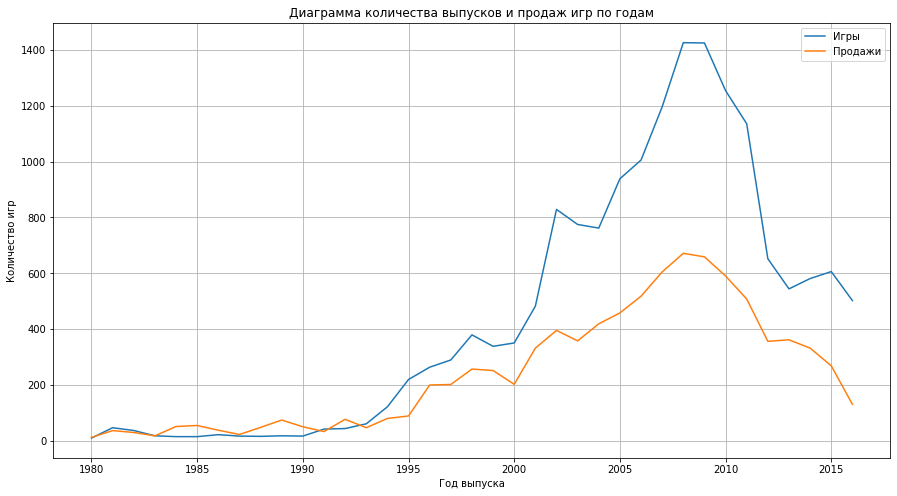

In [37]:
plt.figure(figsize=(15,8))
plt.grid()
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Диаграмма количества выпусков и продаж игр по годам')
plt.plot(data.groupby('year_of_release')['name'].count(), label='Игры')
plt.plot(data.groupby('year_of_release')['total_sales'].sum(), label='Продажи')
plt.legend()
plt.show()

Посмотрим выпуск игр по годам по убыванию:

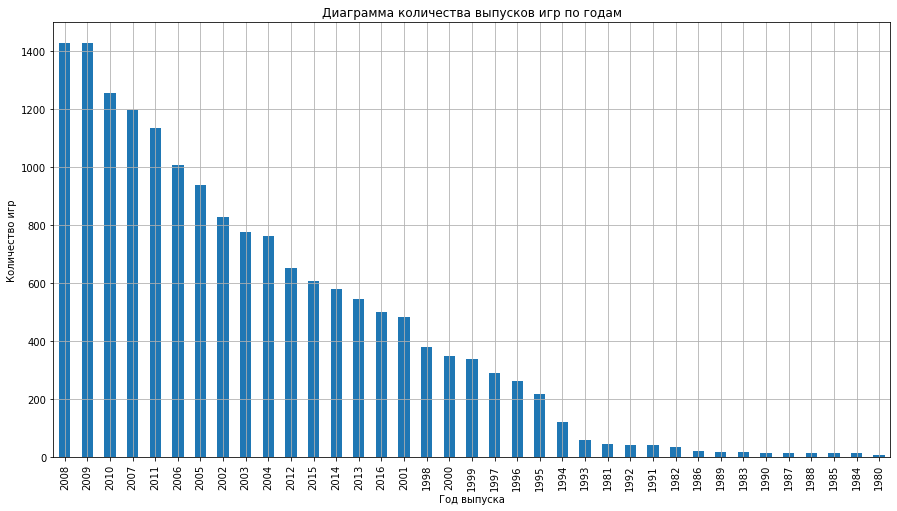

In [38]:
data.groupby('year_of_release')['name'].count().sort_values(ascending=False).plot(figsize=(15,8),kind="bar")
plt.grid()
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Диаграмма количества выпусков игр по годам')
plt.show()

__В 2001-2002 гг. начинается пикообразный рост выпуска игр, максимум выпуска (> 1400 игр в год) приходится на 2008-2009 гг. Далее следуют спад и стабилизация рынка в 2012 г.__

__До 1994 года количество выпусков игр в год не превышало 60. С 1994 года выпуск увеличился более чем в два раза.__ В это время началось широкое распространение [интернета](https://ya.ru/images/search?img_url=https%3A%2F%2Fimage2.slideserve.com%2F3697260%2Fslide2-l.jpg&lr=15&pos=1&rpt=simage&source=related-duck&text=Статистика%20пользователей%20ПК) и рост доступности персональных компьютеров и игровых приставок (например, [PlaySation](https://ya.ru/images/search?img_url=https%3A%2F%2Fsun9-53.userapi.com%2Fimpf%2FwRZV8hzqLg6hjT9J3oMIFGz1uCpdcp14KdLSqg%2FBI6XzYqY0wY.jpg%3Fsize%3D604x453%26quality%3D96%26sign%3De778aa648d668b22cccf8dd673eb9338%26c_uniq_tag%3DkUAkpWbifzt9h45IaOyVA8k4qYatNtpj_MHOp5xdLhc%26type%3Dalbum&lr=15&pos=3&rpt=simage&source=serp&text=динамика%20распространения%20игровых%20приставок%20в%20мире)). 

Посмотрим, как менялось количество выпущенных игр по годам для 10 самых популярных платформ:

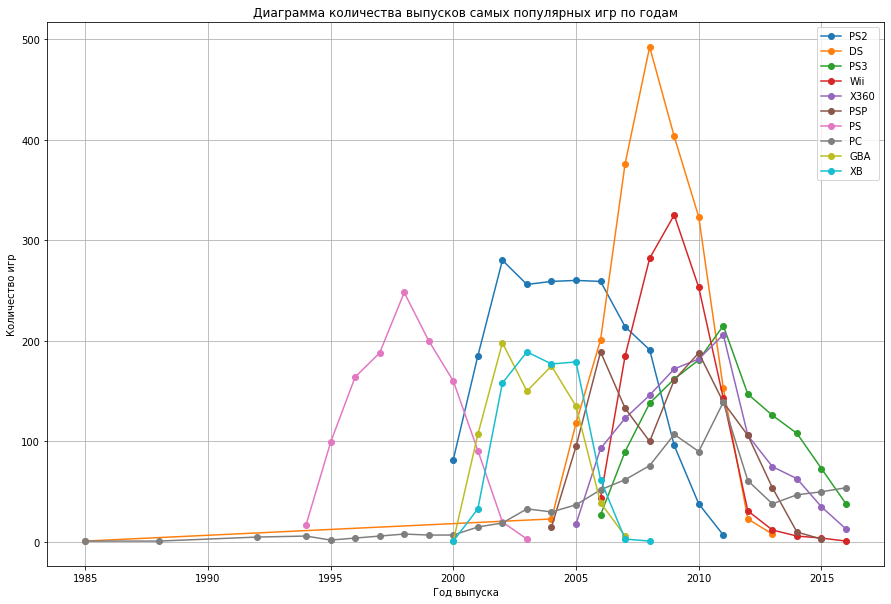

In [39]:
plt.figure(figsize=(15, 10))
platform_top = data.groupby('platform')['name'].count().sort_values(ascending=False).head(10)
for platform in platform_top.index:
    dt = data.query('platform == @platform')
    plt.plot(dt.groupby('year_of_release')['name'].count(), marker ='o', label=platform)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid()
plt.title('Диаграмма количества выпусков самых популярных игр по годам')
plt.legend()
plt.show()

Посмотрим аналогичную информацию в виде тепловой карты. 

Создадим сводную таблицу: 

In [40]:
platform_pivot = data.pivot_table(index='platform',
                                  values='name',
                                  columns = 'year_of_release',
                                  aggfunc = 'count',
                                  margins=True).reset_index()

Построим тепловую карту для платформ с выпусками игр > 200:

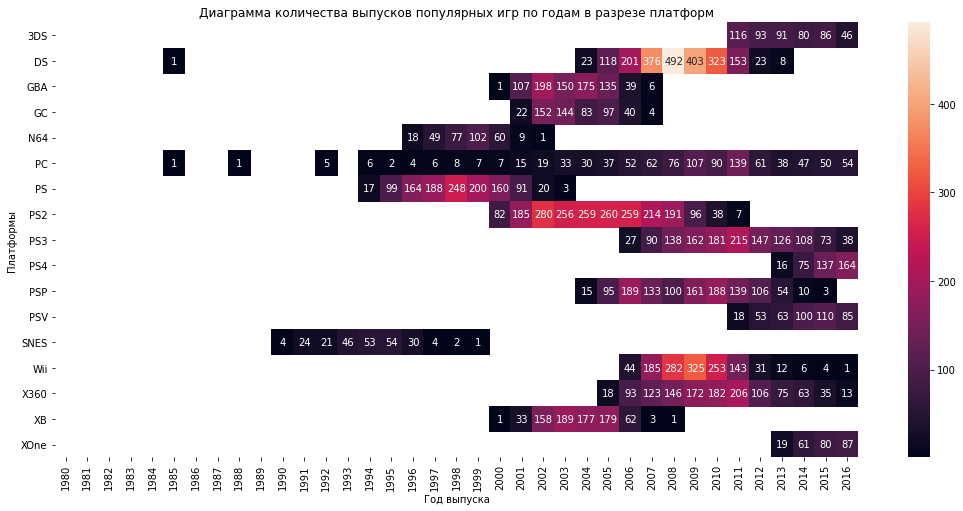

In [41]:
platform_heatmap = platform_pivot.query('All > 200').set_index('platform')[:-1]
platform_heatmap = platform_heatmap.drop(platform_heatmap.columns[[-1]], axis=1) 
plt.figure(figsize=(18, 8))
sns.heatmap(platform_heatmap, annot=True, fmt='.0f')
plt.ylabel('Платформы')
plt.xlabel('Год выпуска')
plt.title('Диаграмма количества выпусков популярных игр по годам в разрезе платформ')
plt.show()

Рассмотрим выброс 1985 года у DS:

In [42]:
data.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_lc,platform_lc,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,ND,strongest tokyo university shogi ds,ds,0.02


Консоль DS была выпущена в 2004 г. Выброс 1985 г. -аномалия. Удалим ее.

In [43]:
data = data.drop(15704, axis=0).reset_index()
# Проверим результат
data.query('platform == "DS" and year_of_release == 1985')

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_lc,platform_lc,total_sales


__Так как до 1994 года ежегодное количество выпусков игр <= 60, то можно исключить этот период из анализа.__

Создадим новую таблицы с данными за 1994-2016 гг.:

In [44]:
data_new = data[data['year_of_release'] > 1993].sort_values(by='year_of_release')
data_new.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_lc,platform_lc,total_sales
9689,9689,Slayers,SNES,1994,Role-Playing,0.0,0.0,0.12,0.0,NaN,NaN,ND,slayers,snes,0.12
6005,6005,International Superstar Soccer,SNES,1994,Sports,0.0,0.0,0.28,0.0,NaN,NaN,ND,international superstar soccer,snes,0.28
8493,8493,Saturday Night Slam Masters,SNES,1994,Fighting,0.0,0.0,0.16,0.0,NaN,NaN,ND,saturday night slam masters,snes,0.16
9755,9755,Bishoujo Senshi Sailormoon S: Juugai Rantou!? ...,SNES,1994,Fighting,0.0,0.0,0.12,0.0,NaN,NaN,ND,bishoujo senshi sailormoon s: juugai rantou!? ...,snes,0.12
9737,9737,Battle Arena Toshinden Remix,SAT,1994,Fighting,0.0,0.0,0.12,0.0,NaN,NaN,ND,battle arena toshinden remix,sat,0.12


<a id='section16'></a>
### Посмотрим, как менялись продажи по платформам. 

Выберем 10 платформ с наибольшими суммарными продажами:

platform
PS2     1233.559937
X360     961.239990
PS3      931.339966
Wii      891.179993
DS       802.760010
PS       727.580017
PS4      314.140015
GBA      312.880005
PSP      289.529999
3DS      257.809998
Name: total_sales, dtype: float32

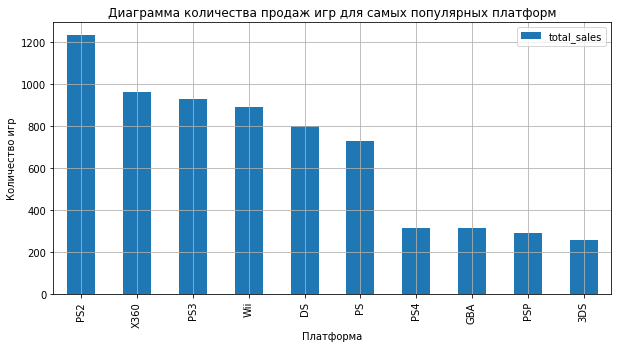

In [45]:
platform_top = data_new.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
display(platform_top)
platform_top.plot(figsize=(10,5), kind="bar")
plt.xlabel('Платформа')
plt.ylabel('Количество игр')
plt.grid()
plt.title('Диаграмма количества продаж игр для самых популярных платформ')
plt.legend()
plt.show()

 Построим распределение по годам по каждой платформе:

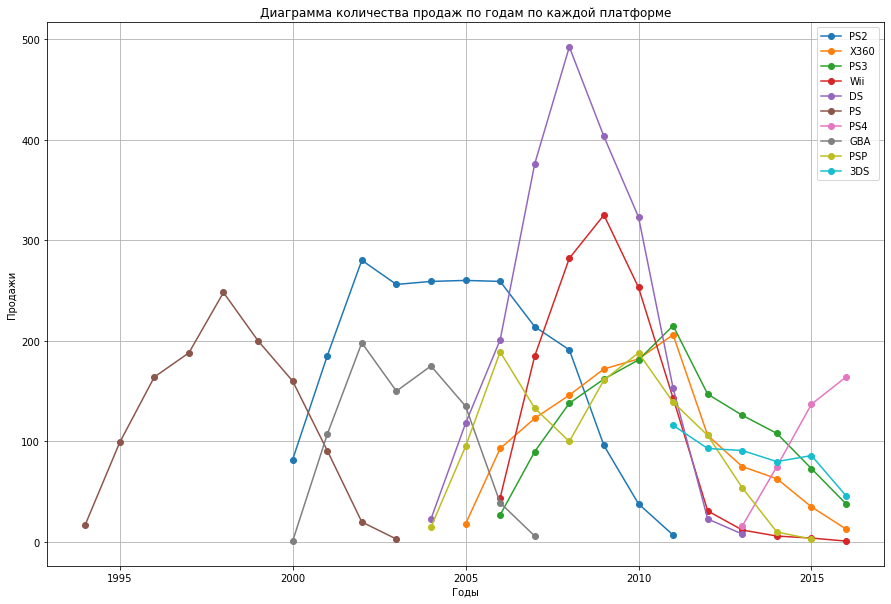

In [46]:
plt.figure(figsize=(15, 10))
for platform in platform_top.index:
    dt = data_new.query('platform == @platform')
    plt.plot(dt.groupby('year_of_release')['total_sales'].count(), marker ='o', label=platform)
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.grid()
plt.title('Диаграмма количества продаж по годам по каждой платформе')
plt.legend()
plt.show()

Посмотрим аналогичную информацию в виде тепловой карты. 

Создадим сводную таблицу: 

In [47]:
platform_pivot = data_new.pivot_table(index='platform',
                                  values='total_sales',
                                  columns = 'year_of_release',
                                  aggfunc = 'sum',
                                  margins=True).reset_index()

Построим тепловую карту для платформ с продажами игр > 10 млн. экземпляров:

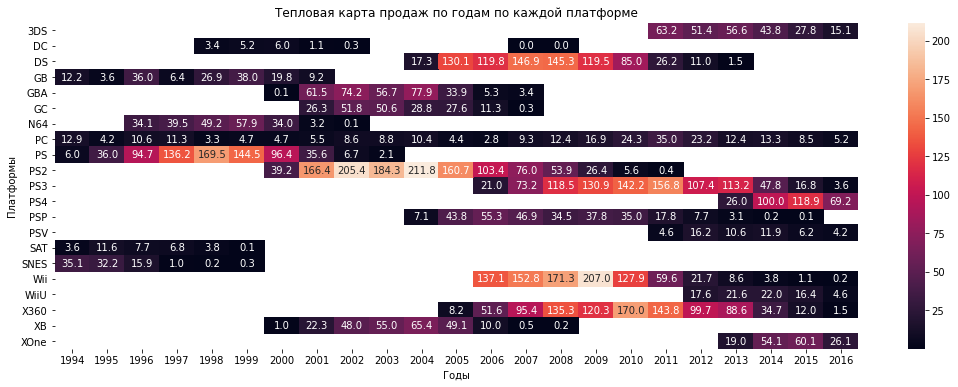

In [48]:
# сформирем промежуточный датафрейм и удалим из него не нужные для графика данные:
platform_heatmap = platform_pivot.query('All > 10').set_index('platform')[:-1]
platform_heatmap = platform_heatmap.drop(platform_heatmap.columns[[-1]], axis=1) 
# построим график:
plt.figure(figsize=(18, 6))
sns.heatmap(platform_heatmap, annot=True, fmt='.1f')
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.title('Тепловая карта продаж по годам по каждой платформе')
plt.show()

<a id='section17'></a>
### Оценим продолжительность жизни платформ

Расчет произведем по данным за весь доступный период (датафрейм data).

In [49]:
# создадим сводную таблицу
platform_life = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
# для удобства переименуем столбцы для простоты
platform_life = platform_life.set_axis(['platform', 'start_life', 'end_life'], axis='columns')
# добавим столбец с продолжительностью жизни
platform_life['life_expectancy'] = platform_life['end_life'] - platform_life['start_life']
platform_life = platform_life.sort_values(by='life_expectancy', ascending=False)

Посмотрим топ-10 платформ по продолжительности жизни:

In [50]:
platform_life.head(10)

,platform,start_life,end_life,life_expectancy
13,PC,1985,2016,31
5,GB,1988,2001,13
11,NES,1983,1994,11
28,X360,2005,2016,11
19,PSP,2004,2015,11
16,PS2,2000,2011,11
3,DC,1998,2008,10
26,Wii,2006,2016,10
17,PS3,2006,2016,10
0,2600,1980,1989,9


Посмотрим описание продожительности жизни платформ:

In [51]:
display(platform_life['life_expectancy'].describe())

count    31.000000
mean      7.000000
std       5.899152
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: life_expectancy, dtype: float64

Средняя продолжительность жизни составляет 7 лет, медианная - 6 лет. Наибольшая жизнь у PC (персональных компьютеров) - 31 год.

Исключим из расчета:
* PC — слишком долго на рынке и не игровая приставка,
* платформы однодневки,
* новые платформы (срок продаж не завершен).

In [52]:
platform_life_correct = platform_life.query('platform != "PC" and life_expectancy > 1 and end_life < 2016')
platform_life_correct

,platform,start_life,end_life,life_expectancy
5,GB,1988,2001,13
11,NES,1983,1994,11
19,PSP,2004,2015,11
16,PS2,2000,2011,11
3,DC,1998,2008,10
0,2600,1980,1989,9
23,SNES,1990,1999,9
15,PS,1994,2003,9
4,DS,2004,2013,9
29,XB,2000,2008,8


Посмотрим описание продожительности жизни платформ:

In [53]:
display(platform_life_correct['life_expectancy'].describe())

count    17.000000
mean      7.823529
std       3.107155
min       2.000000
25%       6.000000
50%       9.000000
75%      10.000000
max      13.000000
Name: life_expectancy, dtype: float64

Средняя продолжительность жизни составляет 8 лет, медианная - 9 лет.

Сравним с самыми популярными по продажам игр платформами:

In [54]:
platform_top

platform
PS2     1233.559937
X360     961.239990
PS3      931.339966
Wii      891.179993
DS       802.760010
PS       727.580017
PS4      314.140015
GBA      312.880005
PSP      289.529999
3DS      257.809998
Name: total_sales, dtype: float32

In [55]:
platform_life.query('platform in @platform_top.index')['life_expectancy'].describe()

count    10.00000
mean      8.60000
std       2.75681
min       3.00000
25%       7.50000
50%       9.50000
75%      10.75000
max      11.00000
Name: life_expectancy, dtype: float64

__Для самых популярных платформ средняя продолжительность жизни составляет 8.6 лет, медианная - 9.5. Т.е. среднее и медианное значения близки. По графикам видно, что пик продаж приходится примерно на середину жизненного цикла платформ.__

Для дальнейшего анализа будем использовать данные за последие 3 года - 2014-2016 гг.

Так как мы планируем рекламную компанию на 2017 г., то необходимо выбрать платформы, у которых в 2016 г. не оканчивается жизненный цикл. Персональные компьютеры не будем исключать из списка, так как эта платформа не прекратит свое существование в долгосрочной песпективе.

In [56]:
target_platform = platform_life.query('end_life == 2016 or platform == "PC"')

Таким образом, целевые платформы:

In [57]:
target_platform

,platform,start_life,end_life,life_expectancy
13,PC,1985,2016,31
28,X360,2005,2016,11
26,Wii,2006,2016,10
17,PS3,2006,2016,10
2,3DS,2011,2016,5
20,PSV,2011,2016,5
27,WiiU,2012,2016,4
18,PS4,2013,2016,3
30,XOne,2013,2016,3


Из построенной ранее тепловой карты продаж (см. ниже) видно, что с учетом не полных данных за 2016 г. (указано в документации), платформы PlayStation 4, XBox One находятся на стадии роста продаж, PC практически стабилен, остальные платформы перешли к спаду. 

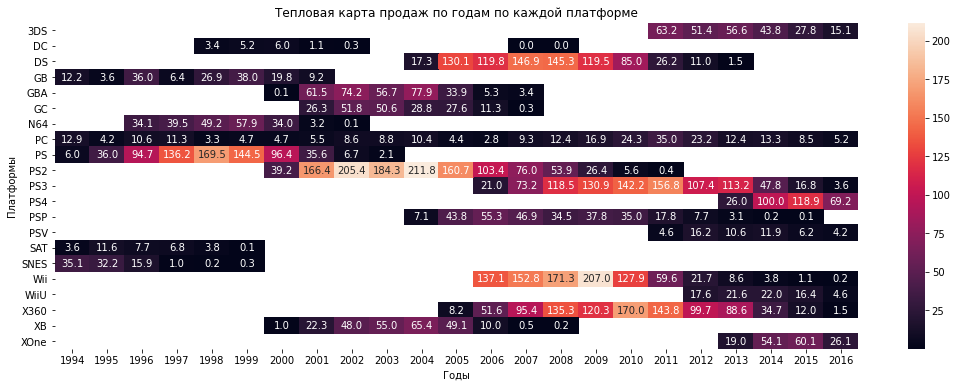

<a id='section18'></a>
### Возьмем данные за соответствующий актуальный период.  

__Для дальнейшего анализа оставим данные за 2014-2016 гг.__

In [58]:
# создадим датафрейм с актуальными данными
data_actual = data.query('year_of_release >= 2014') 
# проверим результат
data_actual.head(10)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_lc,platform_lc,total_sales
31,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,call of duty: black ops 3,ps4,14.630000
42,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,grand theft auto v,ps4,12.620001
47,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,ND,pokemon omega ruby/pokemon alpha sapphire,3ds,11.680000
77,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,fifa 16,ps4,8.580000
87,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,ND,star wars battlefront (2015),ps4,7.980000
92,92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,call of duty: advanced warfare,ps4,7.660000
94,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,fifa 17,ps4,7.600000
96,96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,ND,super smash bros. for wii u and 3ds,3ds,7.550000
99,99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,ND,call of duty: black ops 3,xone,7.390000
105,105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,fallout 4,ps4,7.170000


<a id='section19'></a>
### Определим какие платформы лидируют по продажам, растут или падают. 

Выберем несколько потенциально прибыльных платформ. 

__Как мы уже выявили ранее рост продаж наблюдается у платформ PlayStation 4, XBox One. Они же являются лидерами по продажам в 2016 г.:__

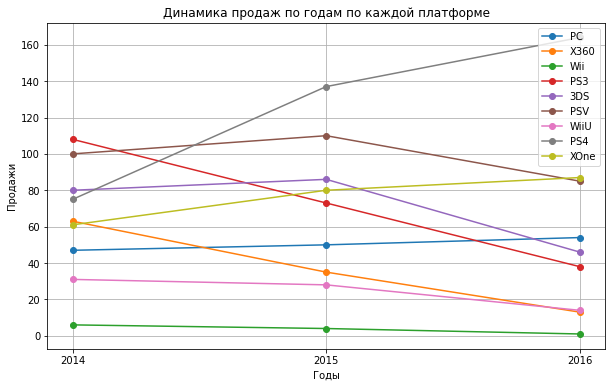

In [59]:
plt.figure(figsize=(10, 6))
for platform in target_platform['platform']:
    dt = data_actual.query('platform == @platform')
    plt.plot(dt.groupby('year_of_release')['total_sales'].count(), marker ='o', label=platform)
plt.xticks(np.arange(2014, 2017, 1))
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.title('Динамика продаж по годам по каждой платформе')
plt.grid()
plt.legend()
plt.show()

Напомним, что некоторый спад в 2016 г. может объясняться тем, что данные за 2016 г. неполные.

<a id='section20'></a>
### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

Построим диаграммы размаха для выбранных платформ за выбранное время. 

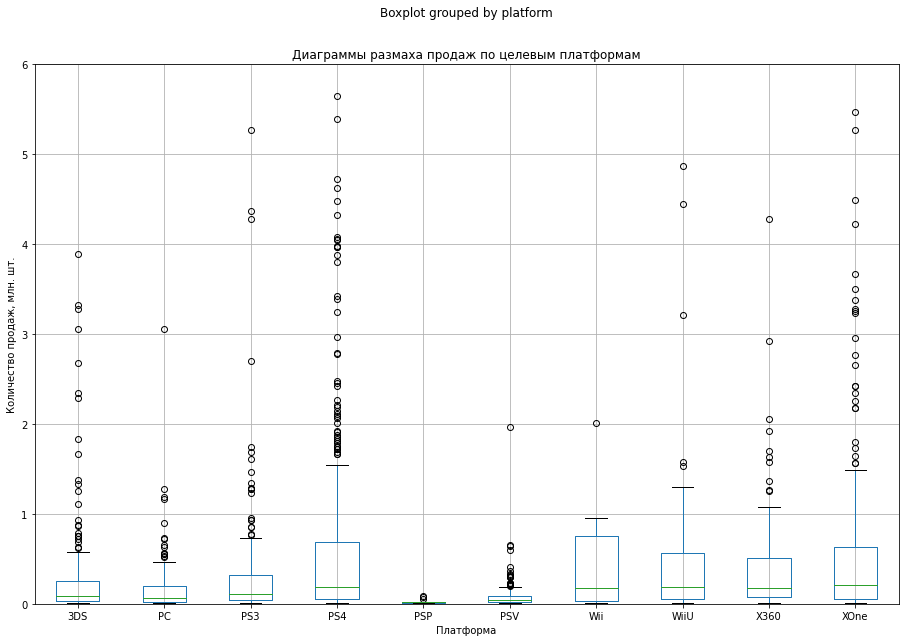

In [60]:
data_actual.boxplot(column='total_sales', by='platform', figsize=(15, 10))
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн. шт.')
plt.title('Диаграммы размаха продаж по целевым платформам')
plt.ylim(0, 6)
plt.show()

Также представим данные в табличном виде:

In [61]:
display(data_actual.query('platform in @target_platform["platform"]')
        .pivot_table(index='platform', values='total_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
        .sort_values(('median', 'total_sales'), ascending=False))

,sum,mean,median,std,count
,total_sales,total_sales,total_sales,total_sales,total_sales
platform,,,,,
XOne,140.360001,0.615614,0.205,1.046513,228
WiiU,42.980000,0.588767,0.190,1.161467,73
PS4,288.149994,0.766356,0.185,1.614969,376
Wii,5.070000,0.460909,0.180,0.625451,11
X360,48.220001,0.434414,0.180,0.628967,111
PS3,68.180000,0.311324,0.110,0.633059,219
3DS,86.680000,0.408868,0.090,1.188368,212
PC,27.050001,0.179139,0.060,0.329359,151


__Медианные значения у всех платформ довольно небольшие. В то же время, значительные выбросы показывают, что у для большинства платформы выпускаются сверхпопулярные игры, которые обеспечивают большой объем продаж. Наиболее заметно это у платформ PS4, PS3,  XOne и 3DS.__

__Лидером продаж является Wii, далее идут PS4 и XOne. Но Wii практически закончила существование.__ PC имеет невысокий, но стабильный объем продаж (рахмах небольшой). PSV довольно "молодая", но не очень успешная в сравнении с конкурентами платформа. PSP прекратила существование в 2016 г.

<a id='section21'></a>
### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

В предыдущем пункте мы установили, что самая популярная платформа PS4. Анализ проведем для нее.

Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами.

In [62]:
# сформируем нужный датафрейм для PS4
data_ps4 = data_actual.query('platform == "PS4"')
# ваыведем на жкран корреляции:
display(f'Корреляция между оценкой критиков и продажами: {data_ps4.critic_score.corr(data_ps4.total_sales):.2}')
display(f'Корреляция между оценкой пользователей и продажами: {data_ps4.user_score.corr(data_ps4.total_sales):.2}')
display(f'Корреляция между оценками критиков и пользователей: {data_ps4.critic_score.corr(data_ps4.user_score):.2}')

'Корреляция между оценкой критиков и продажами: 0.4'

'Корреляция между оценкой пользователей и продажами: -0.04'

'Корреляция между оценками критиков и пользователей: 0.55'

Построим диаграмму рассеяния для оценок критиков:

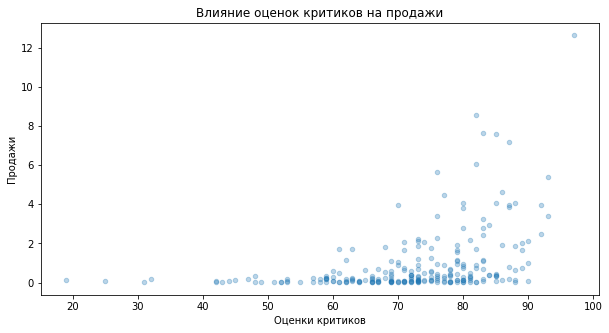

In [63]:
data_ps4.plot.scatter('critic_score', 'total_sales', figsize=(10, 5), alpha=0.3)
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на продажи')
plt.show()

Построим диаграмму рассеяния для оценок пользователей:

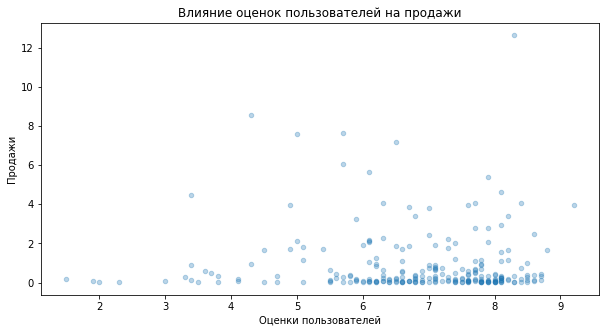

In [64]:
data_ps4.plot.scatter('user_score', 'total_sales', figsize=(10, 5), alpha=0.3)
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на продажи')
plt.show()

Построим диаграмму рассеяния для оценок критиков и пользователей:

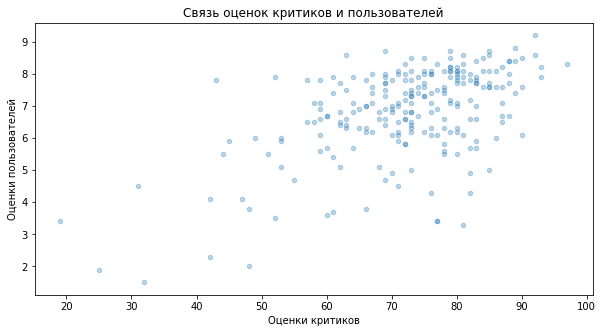

In [65]:
data_ps4.plot.scatter('critic_score', 'user_score', figsize=(10, 5), alpha=0.3)
plt.xlabel('Оценки критиков')
plt.ylabel('Оценки пользователей')
plt.title('Связь оценок критиков и пользователей')
plt.show()

__Между оценками критиков и продажами средняя прямая корреляция - чем выше оценка критиков, тем выше продажи.__

__Между оценками пользователей и продажами незначительная обратная корреляция - может быть связано с тем, что пользователи не всегда ставят высокие оценки широко продаваемым играм или не все пользователи ставят оценки.__

__Между оценками критиков и пользователей средняя прямая корреляция - в целом оценки сходятся.__

__При прогнозе продаж целесообразно опираться на оценки критиков.__

На первых двух диаграммах заметны выбросы с продажами более 10 млн. копий. Посмотрим на эти игры:

In [66]:
data_ps4.query('total_sales > 10')

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_lc,platform_lc,total_sales
31,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,call of duty: black ops 3,ps4,14.630000
42,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,grand theft auto v,ps4,12.620001


`GTA V` и `Call of Duty: Black Ops 3` действительно популярные игры с высокими оценками, что подтверждается другими общедоступными источниками. 

<a id='section22'></a>
### Соотнесем выводы с продажами игр на других платформах.

Посмотрим на величину корреляции для других платформ.

In [67]:
# Подготовим датасет:
dt_corr = []
for platform in target_platform['platform']:
    dt = data_actual.query('platform == @platform')
    dt_corr.append([platform,
                   round(dt.critic_score.corr(dt.total_sales), 2),
                   round(dt.user_score.corr(dt.total_sales), 2),
                   round(dt.critic_score.corr(dt.user_score), 2)])
data_corr = pd.DataFrame(dt_corr, columns = ['platform', 
                                             'critic_sales', 
                                             'user_sales', 
                                             'critic_user'])
display(data_corr)

,platform,critic_sales,user_sales,critic_user
0,PC,0.17,-0.07,0.47
1,X360,0.53,-0.14,0.63
2,Wii,NaN,1.00,NaN
3,PS3,0.45,-0.17,0.69
4,3DS,0.31,0.22,0.86
5,PSV,0.04,-0.17,0.52
6,WiiU,0.37,0.41,0.76
7,PS4,0.40,-0.04,0.55
8,XOne,0.43,-0.07,0.44


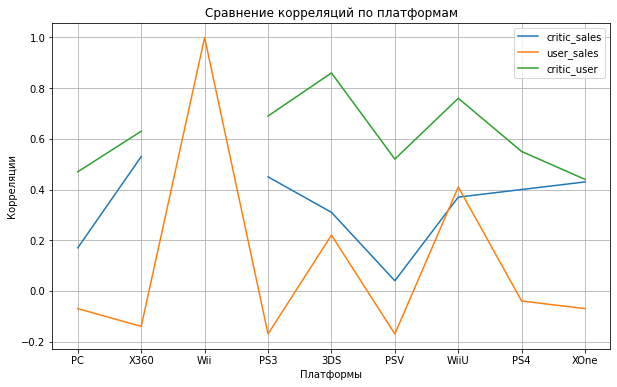

In [68]:
# построим график
data_corr.plot(figsize=(10, 6))
plt.xticks(data_corr.index, data_corr['platform'])
plt.xlabel('Платформы')
plt.ylabel('Корреляции')
plt.title('Сравнение корреляций по платформам')
plt.grid()
plt.show()

__Для различных платформ конкретные значения корреляций отличаются, но в большинстве случаев зависимости совпадают со сделанными выше выводами для платформы PS4 - оценка критиков средне коррелирует с продажами, а корреляция оценок пользователей и продаж незначительная.__

Исключение составляют платформы Wii, WiiU - сильная и средняя корреляция оценок пользователей и продаж. Объясняться может тем, что в актуальном периоде по этим платформам было мало продаж и мало оценок пользователей. 

Построим диаграммы рассеяния для платформы 3DS (максимальная корреляция оценок критиков и пользователей):

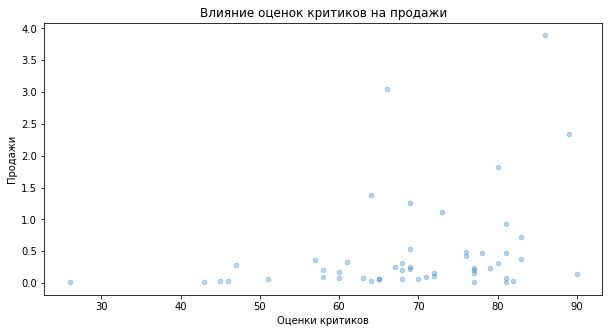

In [69]:
data_actual.query('platform == "3DS"').plot.scatter('critic_score', 'total_sales', figsize=(10, 5), alpha=0.3)
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на продажи')
plt.show()

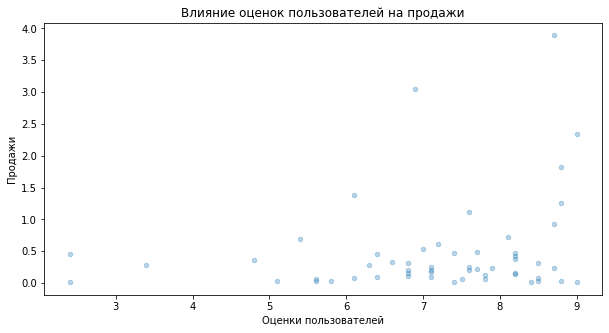

In [70]:
data_actual.query('platform == "3DS"').plot.scatter('user_score', 'total_sales', figsize=(10, 5), alpha=0.3)
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на продажи')
plt.show()

<a id='section23'></a>
### Посмотрим на общее распределение игр по жанрам. 

Сравним жанры по объему продаж:

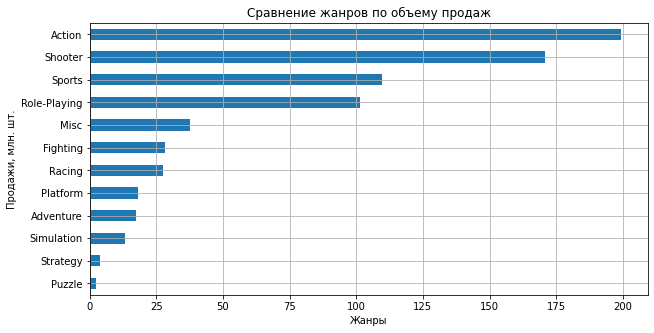

In [71]:
genre_total = data_actual.groupby('genre')['total_sales'].sum().sort_values()
genre_total.plot(y='genre', grid=True, figsize=(10,5), kind='barh')
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн. шт.')
plt.title('Сравнение жанров по объему продаж')
plt.show()

Сравним жанры по количеству выпускаемых игр:

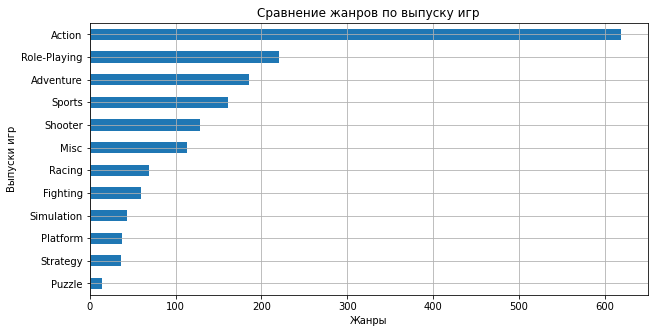

In [72]:
genre_count=data_actual.groupby('genre')['total_sales'].count().sort_values()
genre_count.plot(y='genre', grid=True, figsize=(10,5),kind='barh')
plt.xlabel('Жанры')
plt.ylabel('Выпуски игр')
plt.title('Сравнение жанров по выпуску игр')
plt.show()

Построим сводную таблицу по продажам по жанрам по годам:

In [73]:
genre_sales = data_actual.pivot_table(index='genre', 
                                      values='total_sales', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'sum', 
                                      margins=True).reset_index()
# преобразуем таблицу для удобства
genre_sales = genre_sales[:-1]
genre_sales = genre_sales.rename_axis('index',  axis="columns").set_index('genre').sort_values(by='All', ascending=False)

Построим тепловую карту:

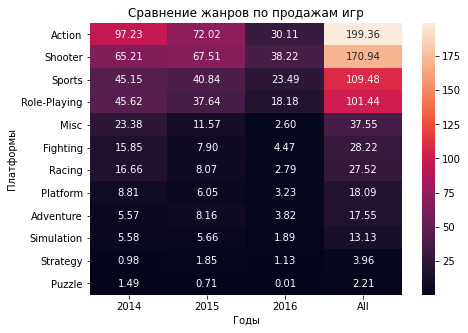

In [74]:
plt.figure(figsize=(7, 5))
sns.heatmap(genre_sales, annot=True, fmt=".2f")
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.title('Сравнение жанров по продажам игр')
plt.show()

__Самый выпускаемый и продаваемый жанр - `Action`. Следом по продажам идут `шутеры, спортивные игры и RPG`. При этом по выпуску шутеры только на 5 месте. Хуже всего продаются стратегии и пазлы.__

Построим диаграммы размаха для всех жанров:

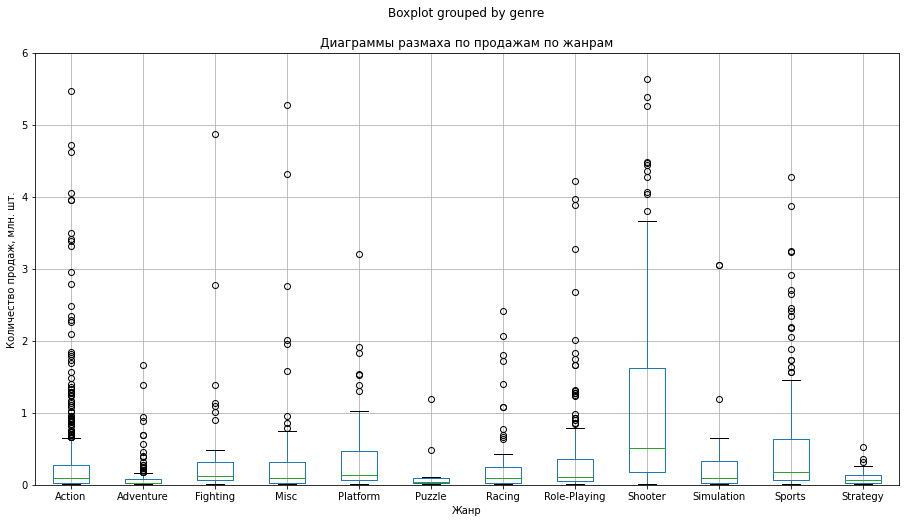

In [75]:
data_actual[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(15,8))
plt.xlabel('Жанр')
plt.ylabel('Количество продаж, млн. шт.')
plt.title('Диаграммы размаха по продажам по жанрам')
plt.ylim(0, 6)
plt.show()

Представим данные и в табличном виде:

In [76]:
(data_actual.pivot_table(index='genre',
                        values='total_sales', 
                        aggfunc=['sum', 
                                 'mean', 
                                 'median', 
                                 'std', 
                                 'count']).reset_index().sort_values(('median', 'total_sales'), ascending=False))

,genre,sum,mean,median,std,count
,,total_sales,total_sales,total_sales,total_sales,total_sales
8,Shooter,170.940002,1.335469,0.515,2.050567,128
10,Sports,109.480003,0.680000,0.180,1.239736,161
4,Platform,18.090000,0.476053,0.140,0.722561,38
2,Fighting,28.219999,0.470333,0.125,1.188053,60
7,Role-Playing,101.440002,0.459005,0.110,1.177284,221
9,Simulation,13.130000,0.298409,0.100,0.646925,44
3,Misc,37.549999,0.332301,0.090,0.736999,113
0,Action,199.360001,0.322068,0.090,0.798181,619
6,Racing,27.520000,0.398841,0.090,0.963716,69


__В тройке лидеров по средним и медианным продажам, и, соответственно, по прибыльности - `шутеры, спортивные игры, платформеры`.__

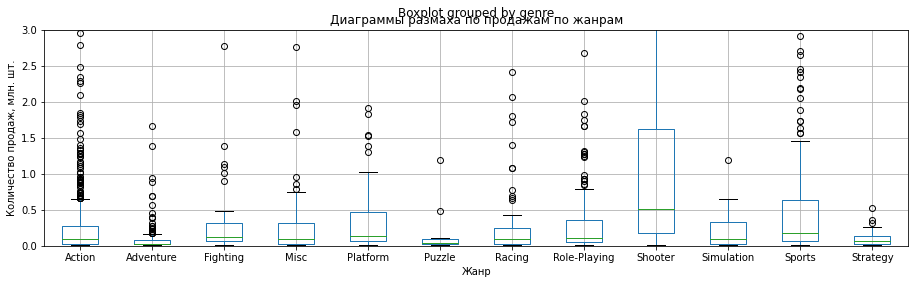

In [77]:
data_actual[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(15,4))
plt.xlabel('Жанр')
plt.ylabel('Количество продаж, млн. шт.')
plt.title('Диаграммы размаха по продажам по жанрам')
plt.ylim(0, 3)
plt.show()

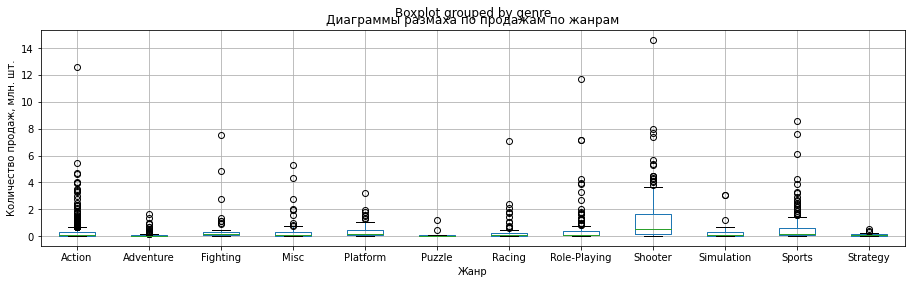

In [78]:
data_actual[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(15,4))
plt.xlabel('Жанр')
plt.ylabel('Количество продаж, млн. шт.')
plt.title('Диаграммы размаха по продажам по жанрам')
# plt.ylim(0, 3)
plt.show()

<a id='section24'></a>
### Промежуточные выводы

В процессе исследовательского анализа данных определили, что:
* В 2001-2002 гг. начинается пикообразный рост выпуска игр, максимум выпуска (> 1400 игр в год) приходится на 2008-2009 гг. Далее следуют спад и стабилизация рынка в 2012 г.
* До 1994 года количество выпусков игр в год не превышало 60. С 1994 года выпуск увеличился более чем в два раза.
* Средняя продолжительность жизни платформ составляет 8 лет, медианная - 9 лет.
* Для самых популярных платформ средняя продолжительность жизни составляет 8.6 лет, медианная - 9.5. Т.е. среднее и медианное значения близки. По графикам видно, что пик продаж приходится примерно на середину жизненного цикла платформ.
* Для дальнейшего анализа данные будем использовать за 2014-2016 гг.
* Рост продаж наблюдается у платформ PlayStation 4, XBox One.
* Медианные значения у всех платформ довольно небольшие. В то же время, значительные выбросы показывают, что почти для каждой платформы выпускаются сверхпопулярные игры, которые обеспечивают большой объем продаж. Наиболее заметно это у платформ PS4, PS3, XOne и 3DS.
* Лидером продаж является Wii, далее идут PS4 и XOne. Но Wii практически закончила существование.
* Между оценками критиков и продажами средняя прямая корреляция - чем выше оценка критиков, тем выше продажи.
* Между оценками пользователей и продажами незначительная обратная корреляция - может быть связано с тем, что пользователи не всегда ставят высокие оценки широко продаваемым играм или не все пользователи ставят оценки.
* Между оценками критиков и пользователей средняя прямая корреляция - в целом оценки сходятся.
* При прогнозе продаж целесообразно опираться на оценки критиков.
* Для различных платформ конкретные значения корреляций отличаются, но в целом зависимости совпадают со сделанными выше выводами для платформы PS4 - оценка критиков средне коррелирует с продажами, а корреляция оценок пользователей и продаж незначительная.
* Самый выпускаемый и продаваемый жанр - `Action`. Следом по продажам идут `шутеры, спортивные игры и RPG`. При этом по выпуску шутеры только на 5 месте. Хуже всего продаются стратегии и пазлы.
* В тройке лидеров по средним и медианным продажам, и, соответственно, по прибыльности - шутеры, спортивные игры, платформеры.

<a id='section25'></a>
## Составим портрет пользователя каждого региона.

Подготовим данные и функцию для оптимизации процесса анализа:

In [79]:
regions = [['na', 'Северной Америке'], 
           ['eu', 'Европе'], 
           ['jp', 'Японии']]

categories = [['platform', 'Популярность платформ', 'рынка платформ'], 
              ['genre', 'Популярность жанров', 'рынка жанров'], 
              ['rating', 'Рейтинги ESRB', 'рейтингов ESRB']]

def top_sales(category):
    i = 1
    plt.figure(figsize=(18, 6))
    plt.suptitle(f'Обзор {category[2]} (портрет покупателя)', fontsize=20, ha='center')
    for region in regions:
        region_sales = region[0]+'_sales'
        region_top_full = data_actual.pivot_table(index=category[0], 
                                                 values=[region_sales], 
                                                 aggfunc=('sum')).sort_values(by=region_sales, ascending=False).reset_index()
        region_top = region_top_full.sort_values(by=region_sales, ascending=False).head(5)
        if category[0] != 'rating':
            region_top.loc[len(region_top.index)] = ['Other', region_top_full[5:][region_sales].sum()]
        region_top = region_top.sort_values(by=region_sales, ascending=False)
        # При необходимости можно раскомментировать следующие строки и посмотреть данные
        # display(f'{category[1]} в {region[1]}')    
        # display(region_top)
        plt.subplot(1, 3, i, title=f'{category[1]} в {region[1]}') 
        plt.pie(region_top[region_sales], 
                labels=list(region_top[category[0]]), 
                autopct='%1.1f%%',
                wedgeprops = { 'linewidth': 3, 'edgecolor': 'white' })
        i += 1
    plt.show()   

Определим для пользователя каждого региона (NA, EU, JP):

<a id='section26'></a>
###	Самые популярные платформы (топ-5). 

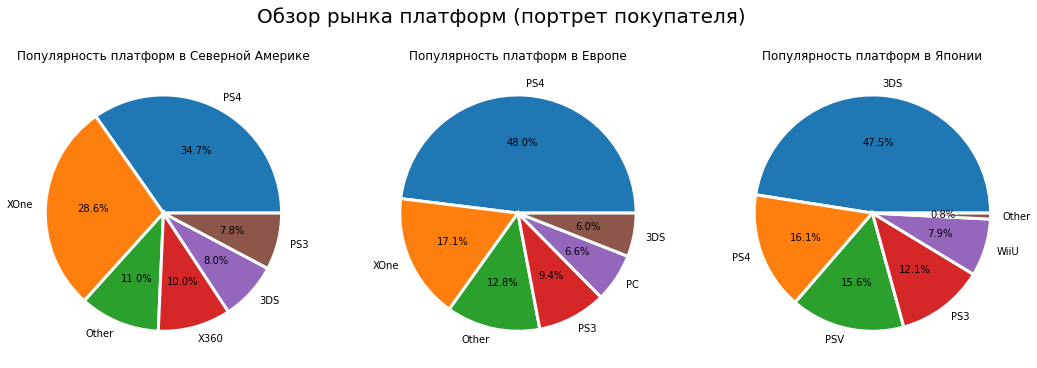

In [80]:
top_sales(categories[0])

__В Северной Америке топ-5 плаформ состоит из PS4, XOne, X360, PS3, 3DS. Суммарная доля XOne и X360 в Северной Америке почти 40%. Производитель этих платформ Microsoft - американская компания.__

__В Европе - PS4, XOne, PS3, PC, 3DS. В Европе более 60% рынка занимают японские приставки.__

__В Японии лидируют 3DS, PS4, PSV, PS3, WiiU от японских компаний Nintendo и Sony.__

__При планировании продаж целесообразно учитывать локализацию компаний - производителей платформ. Очевидно, что они эффективнее осваивают домшние рынки.__

<a id='section27'></a>
### Самые популярные жанры (топ-5). 

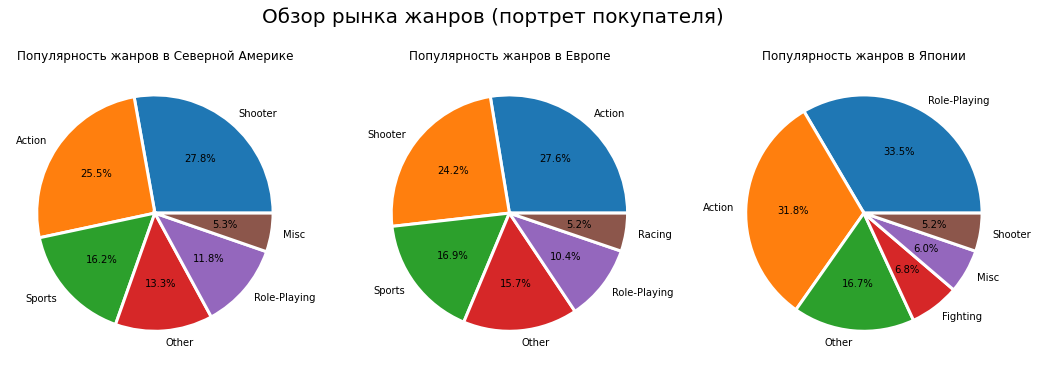

In [81]:
top_sales(categories[1])

__В Северной Америке и Европе топ жанров в основном состоит из шутеров, экшн, спортивных игр и RPG. Менятются местами только шутеры и экшн.__

__В Японии лидируют RPG, следоми идут - экшн, игры категории "другие". Шутеры на последнем месте.__

__Такое распределение жанров вероятно связано с национальными и культурными особенностями регионов. Например, в Японии очень популярны "визуальные новеллы", которые тесно связаны с жанром RPG. В западных странах более популярны игры с активными действиями. Целесоозразно учесть эти предпочтения при планировании продаж.__

<a id='section28'></a>
###	Влияние рейтинга ESRB на продажи в отдельном регионе.

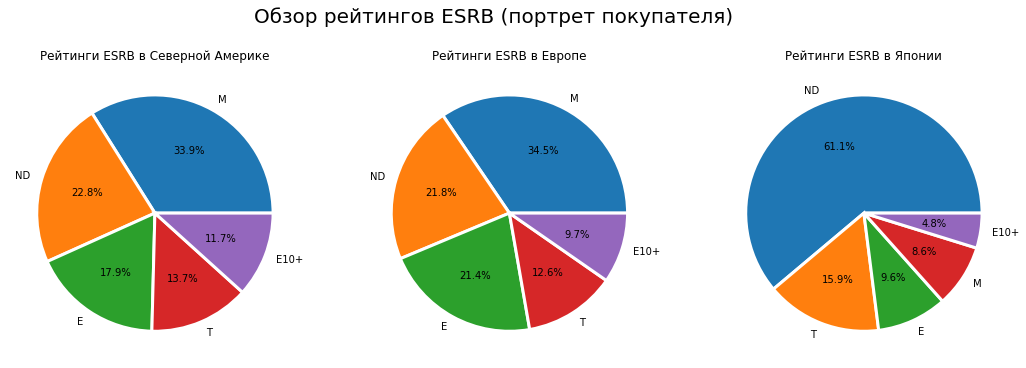

In [82]:
top_sales(categories[2])

Расшиифровка полученных рейтингов:
* ND - нет данных.
* M - для взрослых (17+). 
* E - для всех (6+).
* E10+ - для всех (10+).
* T - для подростков (13+).

__Рейтинги самых продаваемых категорий в Америке, Европе практически совпадают. Больше всего продается игр с рейтингом "M" - для взрослых (17+). Далее следуют игры категории "E" - для всех (6+).__

__Большое количество игр не имеют рейтинга ESRB. Это может быть связано в том числе с тем, что для них установлены рейтинги принятые в других [регионах](https://skillbox.ru/media/gamedev/istoriya-razvitiya-vozrastnykh-reytingov-v-industrii-videoigr/). Например, в Японии используется стандарт CERO, а большинство стран в Европе используют стандарт PEGI. Этим может объясняться то, что в Японии лидируют по продажам игры без рейтинга ESRB - скорее всего это игры местного производства.__

__Таким образом, влияние рейтинга ESRB на продажи нельзя одинаково учиывать во всех регионах.__

<a id='section29'></a>
### Промежуточные выводы:

* В Северной Америке топ-5 плаформ состоит из PS4, XOne, X360, PS3, 3DS. Суммарная доля XOne и X360 в Северной Америке почти 40%. Производитель этих платформ Microsoft - американская компания.
* В Европе - PS4, XOne, PS3, PC, 3DS. В Европе более 60% рынка занимают японские приставки.
* В Японии лидируют 3DS, PS4, PSV, PS3, WiiU от японских компаний Nintendo и Sony.
* При планировании продаж целесообразно учитывать локализацию компаний - производителей платформ. Очевидно, что они эффективнее осваивают домшние рынки.
* В Северной Америке и Европе топ жанров в основном состоит из шутеров, экшн, спортивных игр и RPG. Менятются местами только шутеры и экшн.
* В Японии лидируют RPG, следоми идут - экшн, игры категории "другие". Шутеры на последнем месте.
* Такое распределение жанров вероятно связано с национальными и культурными особенностями регионов. Например, в Японии очень популярны "визуальные новеллы", которые тесно связаны с жанром RPG. В западных странах более популярны игры с активными действиями. Целесоозразно учесть эти предпочтения при планировании продаж.
* Рейтинги самых продаваемых категорий в Америке, Европе практически совпадают. Больше всего продается игр с рейтингом "M" - для взрослых (17+). Далее следуют игры категории "E" - для всех (6+).
* Большое количество игр не имеют рейтинга ESRB. Это может быть связано в том числе с тем, что для них установлены рейтинги принятые в других [регионах](https://skillbox.ru/media/gamedev/istoriya-razvitiya-vozrastnykh-reytingov-v-industrii-videoigr/). Например, в Японии используется стандарт CERO, а большинство стран в Европе используют стандарт PEGI. Этим может объясняться то, что в Японии лидируют по продажам игры без рейтинга ESRB - скорее всего это игры местного производства.
* Таким образом, влияние рейтинга ESRB на продажи нельзя одинаково учиывать во всех регионах.

<a id='section30'></a>
## Общий вывод

__Результаты и основной вывод проведённого исследования:__


1. Рост продаж наблюдается у платформ PlayStation 4, XBox One.
2. Почти для каждой платформы выпускаются сверхпопулярные игры, которые обеспечивают большой объем продаж. Наиболее заметно это у платформ PS4, PS3, XOne и 3DS.
3. Лидером продаж является Wii, далее идут PS4 и XOne. Но Wii практически закончила существование.
4. При прогнозе продаж целесообразно опираться на оценки критиков.
5. В тройке лидеров по прибыльности - шутеры, спортивные игры, платформеры.
6. При планировании продаж целесообразно учитывать локализацию компаний - производителей платформ, так как они эффективнее осваивают домашние рынки.
7. Распределение жанров популярных игр связано с национальными и культурными особенностями регионов. В Японии очень популярны игры RPG. В западных странах более популярны игры с активными действиями. Целесоозразно учесть эти предпочтения при планировании продаж.
8. Влияние рейтинга ESRB на продажи нельзя одинаково учиывать во всех регионах. Надо учитывать имеющиееся региональные стандарты оценки возрастных категорий игр.

__При планировании рекламной компании на 2017 г. в Северной Америке, Европе целесообразно ориентироваться на шутеры, спортивные игры, платформеры  для платформ PS4 и XOne. Для Японии в приоритет надо взять игры RPG для платформ 3DS и PS4. Также, при планировании акции целесообразно учитывать мнения критиков и принятые в конкретном регионе стандарты оценки возрастных категорий игр.__